/home/beto0607/Facultad/Pedestrians/env/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


[1.]
End - while x
End - while y
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
End - while x
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
End - while x
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
End - while x
[0.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
End - while x
End - while y
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
End - while x
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
End - while x
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
End - while x
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
End - while x
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
End - while x
End - while y
End - for


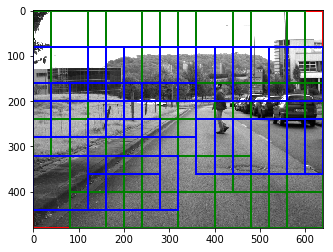

In [39]:
import skimage.io
from sklearn import svm
from sklearn.externals import joblib
from skimage.feature import hog
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


CHECKPOINT_PATH = '/home/beto0607/Facultad/Pedestrians/Checkpoints/svmCheckpoint.pkl'  # Path donde se guarda el SVM ya entrenado

FINAL_SIZE = [96, 48]

IMAGE_PATH = './Test_image.pgm'

WINDOW_SIZE = ((640, 480), (320, 240), (160, 120))
WINDOW_COLOR = ['r','g','b']
WINDOW_STEP_X = 40
WINDOW_STEP_Y = 80 



def LoadCheckpoint():
    return joblib.load(CHECKPOINT_PATH)

def LoadImage():
    return skimage.io.imread(IMAGE_PATH, as_gray = True)
    
def Predict(classifier, img):
    return classifier.predict([hog(img, block_norm='L2-Hys', transform_sqrt=True)])
    
def main():
    classifier = LoadCheckpoint()
    
    img = LoadImage()
    
    fig,ax = plt.subplots(1)
    ax.imshow(img, cmap='gray')

    for index in range(0,  len(WINDOW_SIZE)) :
        x = 0
        y = 0
        
        width =  WINDOW_SIZE[index][0]
        height =  WINDOW_SIZE[index][1]
        
        while(y >=0 and (y + height <= img.shape[0])):
            while(x >=0 and (x + width <= img.shape[1])):
                img_crop = img[y:y+height, x:x+width]
                #print(img_crop.shape, x,y)
                img_crop = skimage.transform.resize(img_crop, FINAL_SIZE)
                prediction = Predict(classifier, img_crop)
                print(prediction)
                if(prediction[0] == 1):
                    bb = patches.Rectangle((x,y),width, height,linewidth=2,edgecolor=WINDOW_COLOR[index],facecolor='none')
                    ax.add_patch(bb)
                x += WINDOW_STEP_X
            print('End - while x')
            y += WINDOW_STEP_Y
            x = 0
        print('End - while y')
    print('End - for')

    plt.show()
    

    
main()